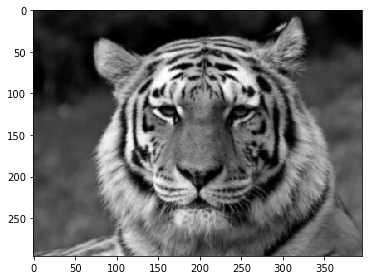

In [136]:
%matplotlib inline

import math
import numpy as np
from skimage import img_as_float
from skimage.io import imread, imshow, imsave

def gauss(s, x, y):
    return (1 / (2 * math.pi * s * s)) * math.exp((-x * x - y * y)/(2 * s * s))

gauss = np.vectorize(gauss)

def gausskernel(s):
    k = round(s * 2 * 3 + 1)
    disp = round(s * 3)
    X, Y = np.ogrid[0:k, 0:k]
    kernel = gauss(s, X-disp, Y -disp)
    kernel/=kernel.sum()
    return kernel

img = imread("img.png")

kernel = gausskernel(0.66)
disp = kernel.shape[0] // 2

def g(y,x):
    return (img[y - disp : y + disp + 1, x - disp : x + disp + 1] * kernel).sum() 

g = np.vectorize(g)
x, y = np.ogrid[disp:img.shape[0]-disp, disp:img.shape[1]-disp]

imsave("out_img.png", g(x,y).astype("ubyte"))
imshow(out_img)